#### **This notsbook prepares the exploratory plots of manually annotated data**

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from tqdm import tqdm
import sys
import os
import re

import importlib

#### packages
import helper.strategy_helper as st_hp
import helper.visualization as vz_hp
import helper.helper as hp
import helper.file_helper as file_hp
import config.config as config_hp
import helper.twitter_helper as twitter_hp
import helper.pandas_helper as pd_hp

#### **Load data**

In [2]:
df_egypt = pd.read_pickle('egypt_022020_annotated_done.pkl.gz')

In [3]:
df_egypt.head()

,Unnamed: 0,username,description,type,country
0,0,realDonaldTrump,45th President of the United States of America🇺🇸,president,USA
1,1,TawakkolKarman,NOBEL PEACE PRIZE LAUREATE. Facebook Oversight...,nobel peace prize laureate,Yemen
2,2,hamadjjalthani,HBJ,politician,Qatar
3,3,KSAembassyTR,الحساب الرسمي لسفارة المملكة العربية السعودية ...,embassy of saudi arabia,Turkey
4,4,AlsisiOfficial,الحساب الرسمي للرئيس عبدالفتاح السيسي رئيس جمه...,president,egypt


#### **Preprocess**

In [75]:
df_egypt['country_text'] = None
df_egypt.loc[df_egypt['country_text'].isnull(), 'country_text'] = 'Not available'
df_egypt['country_text'] = df_egypt['country'].str.lower()


#country
df_egypt.loc[df_egypt['country_text'] == 'ny', 'country_text'] = 'USA'
df_egypt.loc[df_egypt['country_text'] == 'maroc', 'country_text'] = 'Morocoo'
df_egypt.loc[df_egypt['country_text'] == 'moroccan', 'country_text'] = 'Morocoo'
df_egypt.loc[df_egypt['country_text'] == 'morocco', 'country_text'] = 'Morocoo'

df_egypt.loc[df_egypt['country_text'] == 'dubi', 'country_text'] = 'UAE'
df_egypt.loc[df_egypt['country_text'] == 'kurkey', 'country_text'] = 'Turkey'
df_egypt.loc[df_egypt['country_text'] == 'liby', 'country_text'] = 'Libya'
df_egypt.loc[df_egypt['country_text'] == 'sudann', 'country_text'] = 'Sudan'
df_egypt.loc[df_egypt['country_text'] == 'southfield michigan', 'country_text'] = 'USA'
df_egypt.loc[df_egypt['country_text'] == 'southfield michigan', 'country_text'] = 'USA'
df_egypt.loc[df_egypt['country_text'] == 'saudi rabia', 'country_text'] = 'Saudi Arabia'
df_egypt.loc[df_egypt['country_text'] == 'doha', 'country_text'] = 'Qatar'

df_egypt['country_text'] = df_egypt['country_text'].str.capitalize()
df_egypt.loc[df_egypt['country_text'] == 'Egpyt', 'country_text'] = 'Egypt'

df_egypt.loc[df_egypt['country_text'] == 'usa', 'country_text'] = 'USA'
df_egypt.loc[df_egypt['country_text'] == 'London', 'country_text'] = 'UK'
             
df_egypt.loc[
    df_egypt['country_text'] == 'Uae', 
    'country_text'] = 'UAE'
df_egypt.loc[
    df_egypt['country_text'] == 'Saudi arabia',
    'country_text'] = 'Saudi Arabia'
df_egypt.loc[
    df_egypt['country_text'] == 'Usa',
    'country_text'] = 'USA'
df_egypt.loc[df_egypt['country_text'].isnull(), 'country_text'] = 'Not available'


#annotation (profession)

df_egypt['annotation'] = None
df_egypt.loc[df_egypt['type'].str.contains('state official'), 'annotation'] = 'State Official'
df_egypt.loc[df_egypt['type'].str.contains('king'), 'annotation'] = 'State Official'
df_egypt.loc[df_egypt['type'].str.contains('news media'), 'annotation'] = 'News Media'
df_egypt.loc[df_egypt['type'].str.contains('monarch'), 'annotation'] = 'State Official'
df_egypt.loc[df_egypt['type'] == 'president', 'annotation'] = 'State Official'

df_egypt.loc[df_egypt['type'].str.contains('football'), 'annotation'] = 'Sports'
df_egypt.loc[df_egypt['type'].str.contains('nobel peace prize'), 'annotation'] = 'Journalist'
df_egypt.loc[df_egypt['type'].str.contains('politician'), 'annotation'] = 'State Official'

df_egypt.loc[df_egypt['type'].str.contains('embassy of saudi'), 'annotation'] = 'State Department \n Account'
df_egypt.loc[df_egypt['type'].str.contains('random'), 'annotation'] = 'Random Account'
df_egypt.loc[df_egypt['type'].str.contains('pop star'), 'annotation'] = 'Entertainment'
df_egypt.loc[df_egypt['type'].str.contains('actress'), 'annotation'] = 'Entertainment'
df_egypt.loc[df_egypt['type'].str.contains('minister'), 'annotation'] = 'State Official'


df_egypt.loc[df_egypt['type'].str.contains('lawyer'), 'annotation'] = 'Lawyer'
df_egypt.loc[df_egypt['type'].str.contains('journalist'), 'annotation'] = 'Journalist'
df_egypt.loc[df_egypt['type'].str.contains('board of director'), 'annotation'] = 'NGO'
df_egypt.loc[df_egypt['type'].str.contains('entertainment'), 'annotation'] = 'Entertainment'
df_egypt.loc[df_egypt['type'].str.contains('ministry of foreign affairs'), 'annotation'] = 'State Department \n Account'
df_egypt.loc[df_egypt['type'].str.contains('US secretary of state'), 'annotation'] = 'State Official'
df_egypt.loc[df_egypt['type'].str.contains('writer'), 'annotation'] = 'Journalist'
df_egypt.loc[df_egypt['type'].str.contains('not found'), 'annotation'] = 'Not available'
# df_egypt.loc[df_egypt['type'].str.contains('politician'), 'not found'] = 'Entertainment'
df_egypt.loc[df_egypt['type'].str.contains('influencer'), 'annotation'] = 'Influencer'

df_egypt.loc[df_egypt['type'].str.contains('actor'), 'annotation'] = 'Entertainment'
df_egypt.loc[df_egypt['type'].str.contains('twitter account to circulate video'), 'annotation'] = 'Random Account'
df_egypt.loc[df_egypt['type'].str.contains('car account'), 'annotation'] = 'Customer Support \n Account'
df_egypt.loc[df_egypt['type'].str.contains('chairman of southern national dialogue committee'), 'annotation'] = 'State Official'

df_egypt.loc[df_egypt['type'].str.contains('chairman'), 'annotation'] = 'Entertainment'
df_egypt.loc[df_egypt['type'].str.contains('artist singer'), 'annotation'] = 'Entertainment'
df_egypt.loc[df_egypt['type'].str.contains('professor'), 'annotation'] = 'Researcher'
df_egypt.loc[df_egypt['type'].str.contains('youtube channel'), 'annotation'] = 'Random Account'
df_egypt.loc[df_egypt['type'].str.contains('ambassador from new zealand'), 'annotation'] = 'State Official'

df_egypt.loc[df_egypt['type'].str.contains('UAE permanent mission to UN'), 'annotation'] = 'NGO'
df_egypt.loc[df_egypt['type'].str.contains('artist'), 'annotation'] = 'Entertainment'
df_egypt.loc[df_egypt['type'].str.contains('political activist'), 'annotation'] = 'Political Activist'

df_egypt.loc[df_egypt['type'].str.contains('singer'), 'annotation'] = 'Entertainment'
df_egypt.loc[df_egypt['type'].str.contains('media office of libyan national government'), 'annotation'] = 'State Department \n Account'
df_egypt.loc[df_egypt['type'].str.contains('pilot'), 'annotation'] = 'Random Account'


df_egypt.loc[df_egypt['type'].str.contains('activist'), 'annotation'] = 'Political Activist'
df_egypt.loc[df_egypt['type'].str.contains('art historian'), 'annotation'] = 'Random Account'
df_egypt.loc[df_egypt['type'].str.contains('chairman of entertainment'), 'annotation'] = 'Entertainment'
df_egypt.loc[df_egypt['type'].str.contains('filmmaker'), 'annotation'] = 'Entertainment'

df_egypt.loc[df_egypt['type'].str.contains('sports'), 'annotation' ] = 'Sports'
df_egypt.loc[df_egypt['type'].str.contains('media personality'), 'annotation'] = 'Entertainment'
df_egypt.loc[df_egypt['type'].str.contains('musician'), 'annotation'] = 'Entertainment'

df_egypt.loc[df_egypt['type'].str.contains('state account'), 'annotation'] = 'State Department \n Account'
df_egypt.loc[df_egypt['type'].str.contains('ambassador'), 'annotation'] = 'State Official'
df_egypt.loc[df_egypt['type'].str.contains('ceo of apex water'), 'annotation'] = 'Random Account'


df_egypt.loc[df_egypt['type'].str.contains('religious'), 'annotation'] = 'Religious Account'
df_egypt.loc[df_egypt['type'].str.contains('engineer'), 'annotation'] = 'Random Account'
df_egypt.loc[df_egypt['type'].str.contains('blogger'), 'annotation'] = 'Random Account'

df_egypt.loc[df_egypt['type'].str.contains('random (parody)'), 'annotation'] = 'Entertainment'
df_egypt.loc[df_egypt['type'].str.contains('non-profit'), 'annotation'] = 'NGO'
df_egypt.loc[df_egypt['type'].str.contains('non profit'), 'annotation'] = 'NGO'

df_egypt.loc[df_egypt['type'].str.contains('DEMS specialist'), 'annotation'] = 'Random Account'
df_egypt.loc[df_egypt['type'].str.contains('hacker'), 'annotation'] = 'Random Account'
df_egypt.loc[df_egypt['type'].str.contains('customer'), 'annotation'] = 'Customer Support \n Account'


df_egypt.loc[df_egypt['type'].str.contains('researcher'), 'annotation'] = 'Researcher'
df_egypt.loc[df_egypt['type'].str.contains('perfume brand account'), 'annotation'] = 'Customer Support \n Account'
df_egypt.loc[df_egypt['type'].str.contains('political leader'), 'annotation'] = 'State Official'

df_egypt.loc[df_egypt['type'].str.contains('political leader'), 'annotation'] = 'State Official'
df_egypt.loc[df_egypt['type'].str.contains('trade union'), 'annotation'] = 'State Department \n Account'

df_egypt.loc[df_egypt['type'].str.contains('social media'), 'annotation'] = 'Customer Support \n Account'
df_egypt.loc[df_egypt['type'].str.contains('former fighter'), 'annotation'] = 'Random Account'

df_egypt.loc[df_egypt['type'].str.contains('ceo'), 'annotation'] = 'State Official'


df_egypt.loc[
    df_egypt['country_text'] == 'Dubai',
    'country_text'] = 'UAE'
df_egypt.loc[
    df_egypt['country_text'] == 'Middle east',
    'country_text'] = 'Saudi Arabia'
df_egypt.loc[
    df_egypt['country_text'] == 'Global',
    'country_text'] = 'USA'
df_egypt.loc[
    df_egypt['country_text'].isin(['Arab south', 'Gulf and arab world']),
    'country_text'] = 'Saudi Arabia'

/tmp/ipykernel_2104694/3814507570.py:108: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_egypt.loc[df_egypt['type'].str.contains('random (parody)'), 'annotation'] = 'Entertainment'


In [76]:
df_egypt['country_text'].unique()

array(['USA', 'Yemen', 'Qatar', 'Turkey', 'Egypt', 'Saudi Arabia',
       'Kuwait', 'UAE', 'Spain', 'Syria', 'Lebanon', 'Sudan', 'Libya',
       'Morocoo', 'Not available', 'UK', 'Oman', 'Australia', 'Pakistan',
       'Bahrain', 'Toronto', 'Germany', 'Mauritania', 'Jordan', 'France',
       'Tunisia', 'Vietnam', 'Portugal'], dtype=object)

In [77]:
df_egypt['country_text'].nunique()

28

In [78]:
df_egypt['annotation'].unique()

array(['State Official', 'Journalist', 'State Department \n Account',
       'Random Account', 'News Media', 'Entertainment', 'Lawyer',
       'Sports', 'NGO', 'Not available', 'Influencer',
       'Customer Support \n Account', 'Researcher', 'Political Activist',
       'Religious Account'], dtype=object)

In [79]:
df_egypt['annotation'].nunique()

15

In [80]:
df_egypt.head(1)

,Unnamed: 0,username,description,type,country,country_text,annotation
0,0,realDonaldTrump,45th President of the United States of America🇺🇸,president,USA,USA,State Official


In [81]:
df_egypt.to_pickle('egypt_022020_preprocessed.pkl.gz')

#### **The number of target from different countries**

In [2]:
df_egypt = pd.read_pickle('egypt_022020_preprocessed.pkl.gz')
df_country_grp = (df_egypt.groupby(['country_text'])
                  .size()
                  .to_frame('count')
                  .reset_index()
                 )

df_country_grp = df_country_grp.sort_values(by=['count'],
                                            ascending=False)

In [3]:
df_country_grp['count'].sum()

372

In [4]:
df_country_grp['country_text'].nunique() - 1

27

In [5]:
df_country_grp['count'] = df_country_grp['count'].astype(int)

In [6]:
import helper.visualization as vz_hp
importlib.reload(vz_hp)

def bar_graph(parameters):
    keys = parameters.keys()
    
    if 'size' in keys:
        size = parameters['size']
    else:
        size = (8, 8)
        
    
    fig, ax = plt.subplots(figsize=size)
        
    fontsize = parameters['fontsize']
    colors = ['red', 'blue', 'orange', 'red', 'olive', 
              'pink', 'lime', 'maroon']
    
    x = parameters['x']
    y = parameters['y']
    
    if ('bar' in keys) and parameters['bar'] == 'h':
        print('here')
        ax.barh(x,
               y, 
               alpha=0.5,
               color=colors[1],
                )
    else:
        ax.bar(x,
           y, 
           alpha=0.5,
           color=colors[1],
            )
        
    ax.set_ylabel(parameters['ylabel'], fontsize=fontsize)
    ax.set_xlabel(parameters['xlabel'], fontsize=fontsize)


    ax.tick_params(axis='both', which='both', 
                   labelsize=14, labelbottom=True)
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelbottom=True)

    if 'title' in keys:
        title = parameters['title']
        ax.set_title(f'{title}')

    if ('labelrotation' in keys) and parameters['labelrotation'] != None:
        labelrotation = parameters['labelrotation']
    else:
        labelrotation = None
        
    ax.tick_params(axis='x', labelrotation=labelrotation)
    
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
#     ax.spines['bottom'].set_color('none')
#     ax.spines['left'].set_color('none')
    fig.tight_layout()

    if 'show' in keys and parameters['show'] == False:
        plt.close()
    else:
        plt.show()
    
    if 'save' in keys:
        save_path = parameters['save']['path']
        filename = parameters['save']['filename']

        fig.savefig(f'{save_path}/{filename}', 
              facecolor='white', 
              transparent=False)

In [8]:
reply_plot_path

'/N/slate/potem/project/infoOps-strategy/plots/reply_characterization'

here


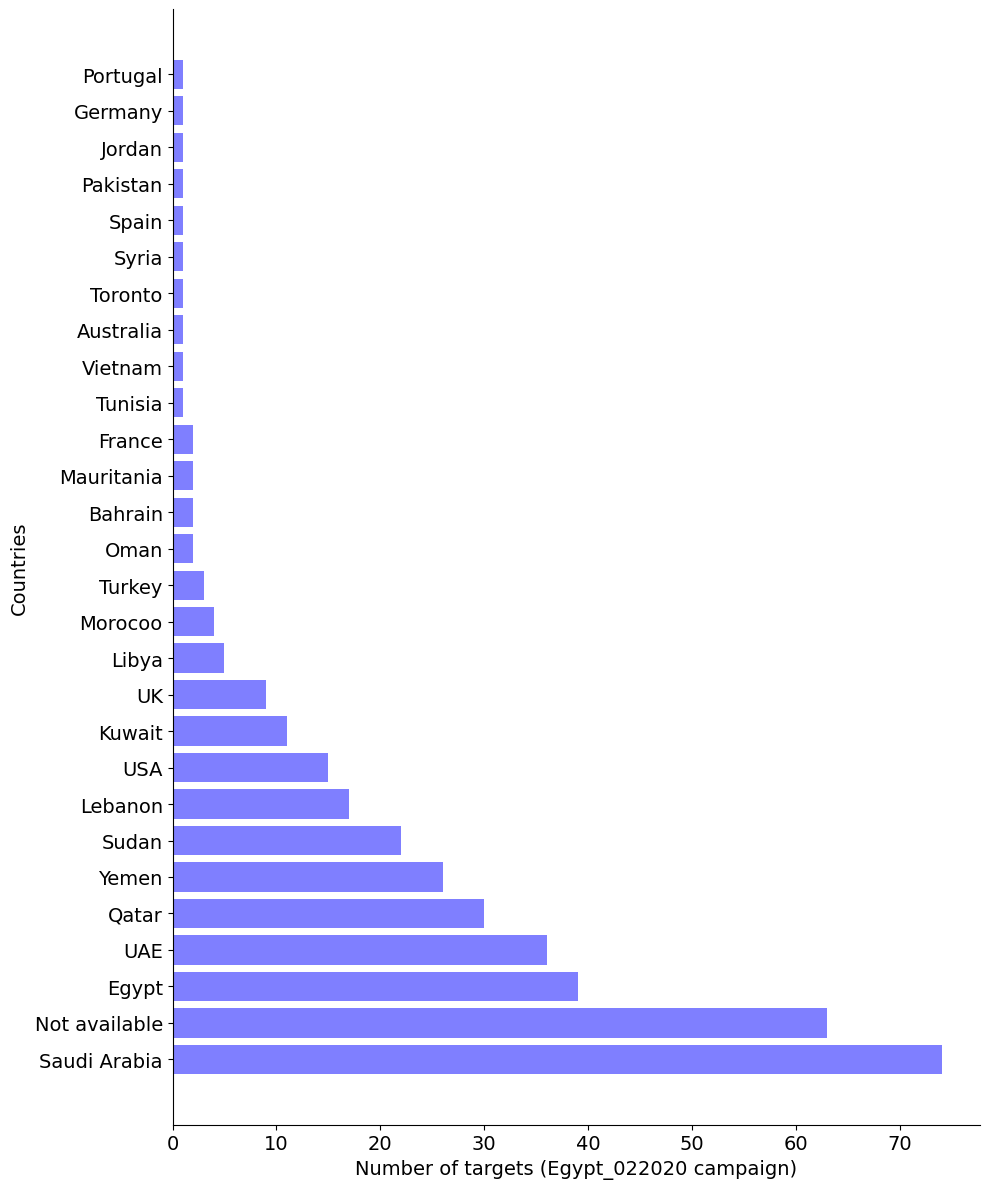

In [7]:
importlib.reload(config_hp)

config = config_hp.config()
plot_path = config['PLOTS']
reply_plot_path = plot_path['reply_plot_path']

# Sample data
x = df_country_grp['country_text'].tolist()
y = df_country_grp['count'].tolist()

parameters =  {
        'fontsize': 14,
        'size': (10, 12),
        'bar': 'h',
        'x': x,
        'y': y,
        'xlabel': 'Number of targets (Egypt_022020 campaign)', 
        'ylabel': 'Countries',
        'legend_location': '',
        # 'labelrotation': 90,
        # 'title': 'Egypt_022020',
        'save': {
            'path': reply_plot_path,
            'filename': 'egypt_022020_target_country.png'
        },
        'random_color': False
    }



bar_graph(parameters)

#### **Types of targets**

In [51]:
# df_egypt['type'].unique()

In [89]:
# all_types = df_egypt['type'].unique().tolist()
# for x in all_types:
#     print(f'\n\n *** {x} ** \n\n')
#     df_found = df_egypt.loc[df_egypt['type'].str.contains(x)]
    
#     print(df_found)
    
#     name = input("Enter your name: ")

In [14]:
df_egypt['annotation'].unique()

array(['State Official', 'Journalist', 'State Department \n Account',
       'Random Account', 'News Media', 'Entertainment', 'Lawyer',
       'Sports', 'NGO', 'Not available', 'Influencer',
       'Customer Support \n Account', 'Researcher', 'Political Activist',
       'Religious Account'], dtype=object)

In [15]:
df_egypt.loc[df_egypt['annotation'] == 'Random Account', 'annotation'] = 'Not available'

In [16]:
df_egypt['annotation'].nunique()

14

In [17]:
df_egypt.loc[df_egypt['annotation'].isnull()]

,Unnamed: 0,username,description,type,country,country_text,annotation


14
14
here


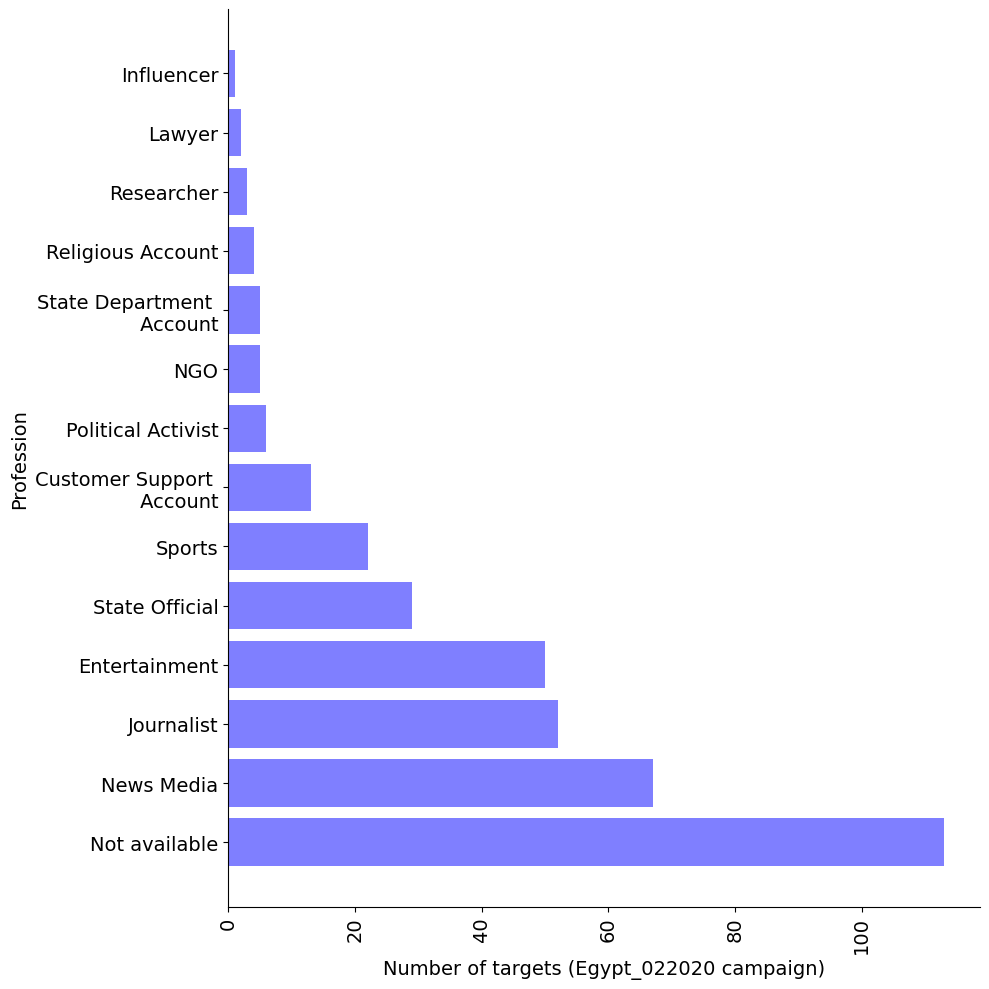

In [18]:
df_person_grp = (df_egypt.groupby(['annotation'])
                  .size()
                  .to_frame('count')
                  .reset_index()
                 )

df_person_grp = df_person_grp.sort_values(by=['count'],
                                          ascending=False)


importlib.reload(config_hp)

config = config_hp.config()
plot_path = config['PLOTS']
reply_plot_path = plot_path['reply_plot_path']


# Sample data
x = df_person_grp['annotation'].tolist()
y = df_person_grp['count'].tolist()

print(len(x))
print(len(y))

parameters =  {
        'fontsize': 14,
        'size': (10, 10),
        'x': x,
        'y': y,
        'bar': 'h',
        'labelrotation': 90,

        'xlabel': 'Number of targets (Egypt_022020 campaign)',
        'ylabel': 'Profession',
        'legend_location': '',
        # 'title': 'Egypt_022020',
        'save': {
            'path': reply_plot_path,
            'filename': 'egypt_022020_target_profession.png'
        },
        'random_color': False
    }



bar_graph(parameters)

#### **Make common annotation**

In [2]:
df_egypt = pd.read_pickle('egypt_022020_preprocessed.pkl.gz')


df_egypt.rename(columns={'country_text': 'country_label',
                         'annotation': 'type_label'
                        }, inplace=True)

print(df_egypt.columns)

df_egypt['type_label'].unique()

replace = {
    'Random Account': 'Random',
    'Political Activist': 'Activist',
    'State Department \n Account': 'State Department',
    'Influencer': 'Social Media Influencer',
}

df_egypt['type_label'] = df_egypt['type_label'].replace(replace)


df_egypt[['username',
           'description',
           'type_label',
           'country_label'
          ]].to_pickle('./data/egypt_annotated_preprocessed.pkl.gz')

Index(['Unnamed: 0', 'username', 'description', 'type', 'country',
       'country_label', 'type_label'],
      dtype='object')
